In [123]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [124]:
df = pd.read_table("babyboom.dat.txt", header=None, sep='\s+', 
                   names=['24hrtime','sex','weight','minutes'])
df.head()

,24hrtime,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


#draw exponential law
$$
f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}
$$


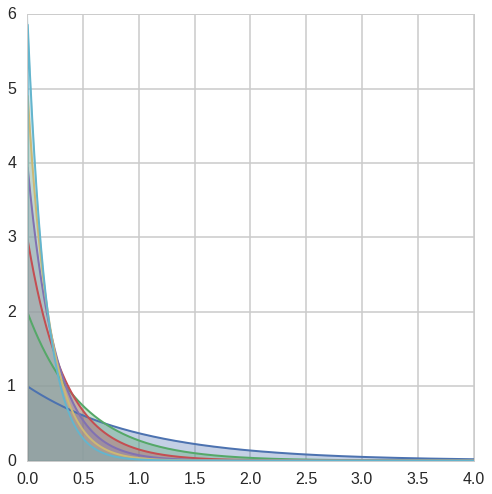

In [125]:
from scipy.stats import expon
serie = np.linspace(0,4,1000)
f = lambda x,l : l*np.exp(-l*x)*(x>0)
plt.figure(figsize=(8,8))
lambda_range = range(1,10)
colors=sns.color_palette()


for l,c in zip(lambda_range, colors):
    plt.plot(serie, f(serie,l),lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(serie, expon.pdf(serie, scale=1./l), color=c, alpha = .33)

## Draw the birth interval distribution and match it with an exponential distro

spread =  73
lambda_e =  0.0307692307692 mn


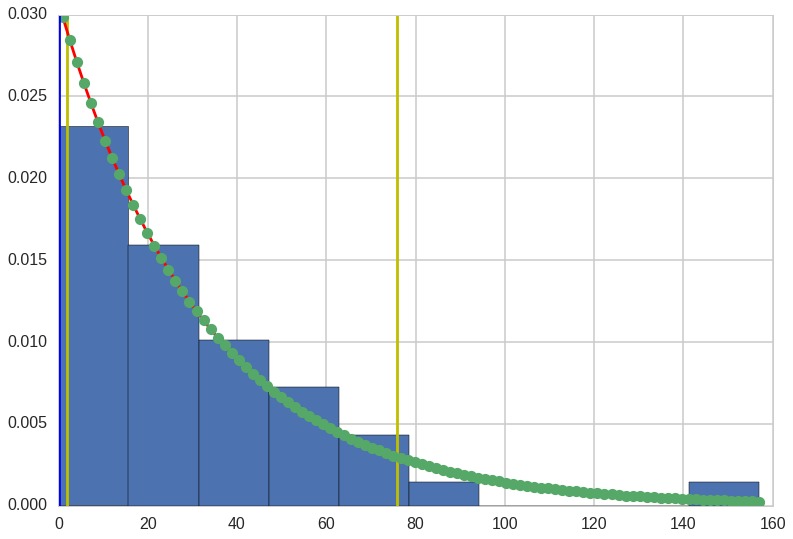

In [126]:
df = df.sort_values('minutes')
df['interval'] = df.minutes.diff()
df = df.fillna(0)
plt.hist(df.interval, normed=True)

p05 = np.percentile(df.interval, 5.)
p95 = np.percentile(df.interval, 95.)
iq = int(p95 - p05)

print "spread = ",iq

plt.axvline(p05,color="y")
plt.axvline(p95,color="y")


from scipy.stats import expon
xpoints = np.linspace(1,df.interval.max(),100)
lambda_e = 1./df.interval.mean()
print "lambda_e = ",lambda_e,"mn"

f = lambda x : lambda_e*np.exp(-x*lambda_e)

plt.plot(xpoints, expon.pdf(xpoints,scale=1./lambda_e ), color="r")
plt.plot(xpoints, f(xpoints) ,'o')
#plt.plot(xpoints, expon.cdf(xpoints,scale=1./lambda_e), color="g")

plt.axvline(lambda_e)

## Draw the birth rate per hour and match it poisson distro

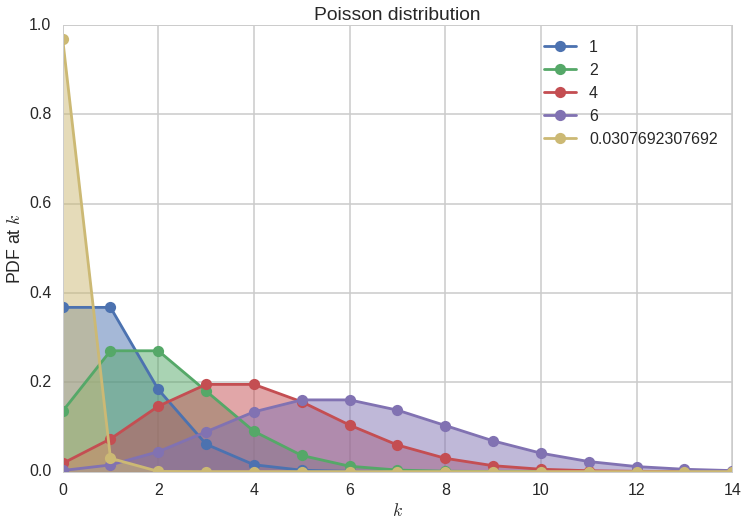

In [127]:
from scipy.stats import poisson
k = np.arange(15)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6, lambda_e
                        ]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$");

In [195]:
#group births by frequency per hour
df.head()
df.describe()
df['hour'] = df.minutes//60
groupby_hours = df.groupby(df.hour).count()
groupby_hours.mean()


24hrtime    2.095238
sex         2.095238
weight      2.095238
minutes     2.095238
interval    2.095238
dtype: float64